![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Compare SSH, gradients and Laplacian pdf in Gulf Stream </center></h1></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from src import mod_plot
from src import mod_switchvar
from src.dict_regions_info import *

In [10]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py

denoising_name1 = 'Unet_baseline'

denoising_name2 = 'Gomez_V2'

denoising_name3 = 'UnetGomez'

<div class="alert alert-info" role="alert">

<h2>1. Read from regional data file </h2>

</div>

From: "../swot_data/swot_1j_share_'region'.nc"

In [5]:
path_data = '../denoised_data/swot_1j_share_'+region_info['name']+'_gomezfilt2_Unetgomezfilt.nc'

orbit = '1d'

ds_SWOT = xr.open_mfdataset(path_data)
 

<div class="alert alert-info" role="alert">

<h2>2. PDFs computed over all passes (1d orbit) </h2>

</div>

## Compute SSH gradients and Laplacian

In [6]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)
grad_denoised_method, lapl_denoised_method = mod_switchvar.deriv1and2(ds_SWOT.ssha_gomezfilt)
grad_denoised_method2, lapl_denoised_method2 = mod_switchvar.deriv1and2(ds_SWOT.ssha_unetgomezfilt)

## Compute PDFs

In [7]:
ssh_noisy = np.ravel(ds_SWOT.ssha_new_editing)
ssh_noisy = ssh_noisy[~np.isnan(ssh_noisy)]

ssh_baseline = np.ravel(ds_SWOT.ssha_denoised_unet)
ssh_baseline = ssh_baseline[~np.isnan(ssh_baseline)]

ssh_denoised = np.ravel(ds_SWOT.ssha_gomezfilt)
ssh_denoised = ssh_denoised[~np.isnan(ssh_denoised)]

ssh_denoised2 = np.ravel(ds_SWOT.ssha_unetgomezfilt)
ssh_denoised2 = ssh_denoised2[~np.isnan(ssh_denoised2)]

grad_noisy = np.ravel(grad_new_editing)
grad_noisy = grad_noisy[~np.isnan(grad_noisy)]

grad_baseline = np.ravel(grad_denoised_unet)
grad_baseline = grad_baseline[~np.isnan(grad_baseline)]

grad_denoised = np.ravel(grad_denoised_method)
grad_denoised = grad_denoised[~np.isnan(grad_denoised)]

grad_denoised2 = np.ravel(grad_denoised_method2)
grad_denoised2 = grad_denoised2[~np.isnan(grad_denoised2)]

lapl_noisy = np.ravel(lapl_new_editing)
lapl_noisy = lapl_noisy[~np.isnan(lapl_noisy)]

lapl_baseline = np.ravel(lapl_denoised_unet)
lapl_baseline = lapl_baseline[~np.isnan(lapl_baseline)]

lapl_denoised = np.ravel(lapl_denoised_method)
lapl_denoised = lapl_denoised[~np.isnan(lapl_denoised)]

lapl_denoised2 = np.ravel(lapl_denoised_method2)
lapl_denoised2 = lapl_denoised2[~np.isnan(lapl_denoised2)]


## Plot PDFs' histograms

In [8]:
init_date = str(ds_SWOT.time[0,0].values.astype('datetime64[D]'))
end_date = str(ds_SWOT.time[-1,0].values.astype('datetime64[D]'))

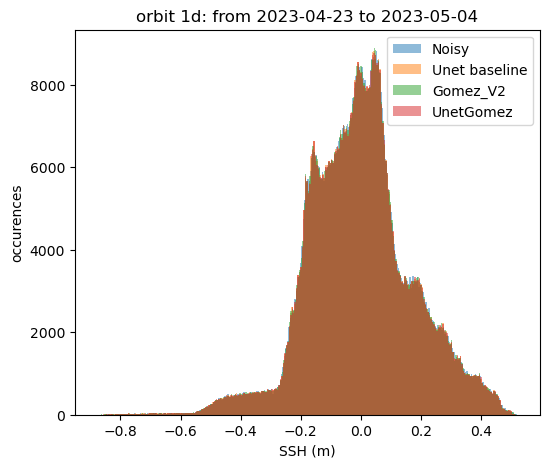

In [16]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)
plt.hist(ssh_noisy, bins='auto',label='Noisy', alpha = 0.5, color = 'tab:blue')
plt.hist(ssh_baseline, bins='auto',label='Unet baseline', alpha = 0.5, color = 'tab:orange') 
plt.hist(ssh_denoised, bins='auto',label=denoising_name2, alpha = 0.5, color = 'tab:green') 
plt.hist(ssh_denoised2, bins='auto',label=denoising_name3, alpha = 0.5, color = 'tab:red') 
plt.xlabel('SSH (m)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_compare_'+region_info['name']+'_'+orbit+'_ssh.png')
plt.show()

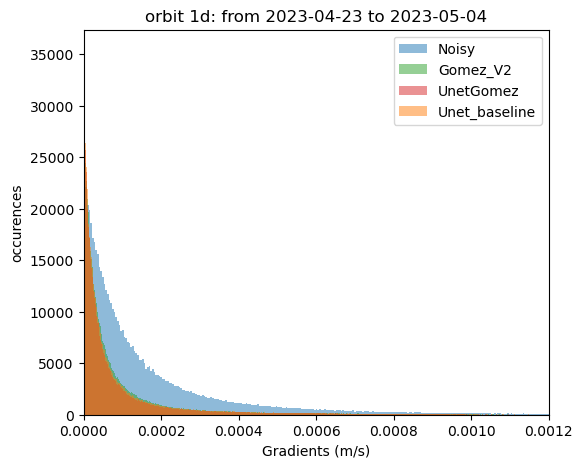

In [14]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(grad_noisy, bins='auto',label='Noisy', alpha = 0.5, color = 'tab:blue')
plt.hist(grad_denoised, bins='auto',label=denoising_name2, alpha = 0.5, color = 'tab:green') 
plt.hist(grad_denoised2, bins='auto',label=denoising_name3, alpha = 0.5, color = 'tab:red') 
plt.hist(grad_baseline, bins='auto',label=denoising_name1, alpha = 0.5, color = 'tab:orange') 
plt.xlim(0,0.0012)
plt.xlabel('Gradients (m/s)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_compare_'+region_info['name']+'_'+orbit+'_grad.png')
plt.show()

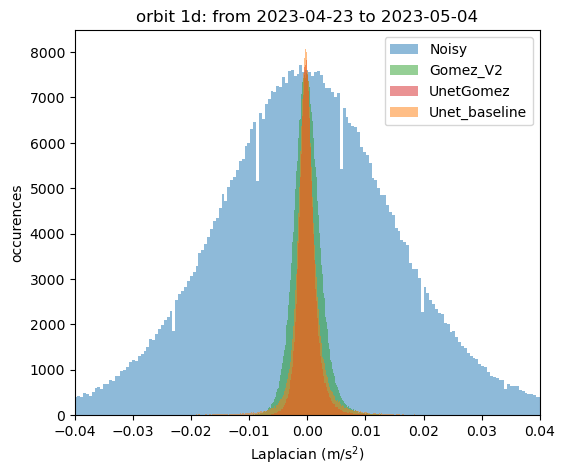

In [15]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(lapl_noisy, bins='auto',label='Noisy', alpha = 0.5, color = 'tab:blue')
plt.hist(lapl_denoised, bins='auto',label=denoising_name2, alpha = 0.5, color = 'tab:green') 
plt.hist(lapl_denoised2, bins='auto',label=denoising_name3, alpha = 0.5, color = 'tab:red') 
plt.hist(lapl_baseline, bins='auto',label=denoising_name1, alpha = 0.5, color = 'tab:orange') 
plt.xlim(-0.04,0.04)
plt.xlabel('Laplacian (m/s$^2$)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_compare_'+region_info['name']+'_'+orbit+'_lapl.png')
plt.show()